In [449]:
# words = open('names.txt', 'r').read().splitlines()
names = [
    'Maxim',
    'Andrej',
    'Anna',
    'Lex',
    'Jeremy',
    'Sergei',
    'Alexander',
    'Maxeo',
    'George',
    'Elon',
    'Faust',
    'Michael',
    'Jennifer',
    'James',
    'Emily',
    'David',
    'Ashley',
    'Christopher',
    'Sarah',
    'Matthew',
    'Jessica',
    'Joshua',
    'Megan',
    'Daniel',
    'Amanda',
    'Ryan',
    'Ethan',
    'Olivia',
    'Lucas',
    'Sophia',
    'Liam',
    'Ava',
    'Noah',
    'Isabella',
    'Mason',
    'Mia',
    'Jacob',
    'Charlotte',
    'William',
    'Abigail',
    'Jack',
    'Madison',
    'Henry',
    'Ella',
    'Samuel',
    'Quentin',
    'Grace',
    'Logan',
    'Victoria',
    'Owen',
    'Chloe',
    'Nathan',
    'Lily',
    'Benjamin',
    'Zoe',
    'Andrew',
    'Nora',
    'Thomas',
    'Hannah',
    'Joseph',
    'Amelia',
    'Robert',
    'Luna',
    'Charles',
    'Scarlett',
    'Jason',
    'Harper',
    'Aaron',
    'Aria',
    'Tyler',
    'Ellie',
    'Brian',
    'Sophie',
    'Kevin',
    'Aurora',
    'Steven',
    'Hazel',
    'Eric',
    'Zoey',
    'Patrick',
    'Stella',
    'Mark',
    'Lucy',
    'Anthony',
    'Peyton',
    'Brandon',
    'Layla',
    'Sean',
    'Savannah',
    'Richard',
    'Skylar',
    'Paul',
    'Ariana',
    'Edward',
    'Brooklyn',
    'Peter',
    'Caroline',
    'Scott',
    'Aubrey',
    'Jason',
    'Penelope'
]

words = [name.lower() for name in names]
# words = [
#     'mam',
#     'max',
# ]

In [450]:
# train a trigram language model, i.e. take two characters as an input to predict the 3rd one
# Feel free to use either counting or a neural net. Evaluate the loss; 
# Did it improve over a bigram model?

In [451]:
special = '.'
chars = sorted(list((set(''.join(words)))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi[special] = 0
itos = {i:s for s, i in stoi.items()}

more_chars = sorted(list((set(''.join(words)))))
more_chars.extend(special)

char_pairs = [ch1 + ch2 for ch1 in more_chars for ch2 in more_chars]
ptoi = {s:i for i, s in enumerate(char_pairs)}
itop = {i:s for s, i in ptoi.items()}

# print(itop)
print(ptoi)

{'aa': 0, 'ab': 1, 'ac': 2, 'ad': 3, 'ae': 4, 'af': 5, 'ag': 6, 'ah': 7, 'ai': 8, 'aj': 9, 'ak': 10, 'al': 11, 'am': 12, 'an': 13, 'ao': 14, 'ap': 15, 'aq': 16, 'ar': 17, 'as': 18, 'at': 19, 'au': 20, 'av': 21, 'aw': 22, 'ax': 23, 'ay': 24, 'az': 25, 'a.': 26, 'ba': 27, 'bb': 28, 'bc': 29, 'bd': 30, 'be': 31, 'bf': 32, 'bg': 33, 'bh': 34, 'bi': 35, 'bj': 36, 'bk': 37, 'bl': 38, 'bm': 39, 'bn': 40, 'bo': 41, 'bp': 42, 'bq': 43, 'br': 44, 'bs': 45, 'bt': 46, 'bu': 47, 'bv': 48, 'bw': 49, 'bx': 50, 'by': 51, 'bz': 52, 'b.': 53, 'ca': 54, 'cb': 55, 'cc': 56, 'cd': 57, 'ce': 58, 'cf': 59, 'cg': 60, 'ch': 61, 'ci': 62, 'cj': 63, 'ck': 64, 'cl': 65, 'cm': 66, 'cn': 67, 'co': 68, 'cp': 69, 'cq': 70, 'cr': 71, 'cs': 72, 'ct': 73, 'cu': 74, 'cv': 75, 'cw': 76, 'cx': 77, 'cy': 78, 'cz': 79, 'c.': 80, 'da': 81, 'db': 82, 'dc': 83, 'dd': 84, 'de': 85, 'df': 86, 'dg': 87, 'dh': 88, 'di': 89, 'dj': 90, 'dk': 91, 'dl': 92, 'dm': 93, 'dn': 94, 'do': 95, 'dp': 96, 'dq': 97, 'dr': 98, 'ds': 99, 'dt': 100

In [452]:
import torch

In [456]:
N = torch.zeros((27, 27), dtype=torch.int32)
N2 = torch.zeros((16, 27), dtype=torch.int32)
N2 = torch.zeros((728, 27), dtype=torch.int32)

In [457]:
for w in words:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        # increment counter in coordinates of related "bigram"
        N[ix1, ix2] += 1

    ### trinomial part

    characters = [special] + list(w) + [special]
    # print(characters)
    
    for ch1, ch2, ch3 in zip(characters, characters[1:], characters[2:]):
        # numerical representation of character
        # print(ch1,ch2,ch3)
        ix1 = ptoi[ch1+ch2]
        ix2 = stoi[ch3]
        
        
        print(ch1+ch2, ch3, ix1, ix2)
        # increment counter in coordinates of related "bigram"
        N2[ix1, ix2] += 1

.m a 714 1
ma x 324 24
ax i 23 9
xi m 629 13
im . 228 0
.a n 702 14
an d 13 4
nd r 354 18
dr e 98 5
re j 463 10
ej . 117 0
.a n 702 14
an n 13 14
nn a 364 1
na . 351 0
.l e 713 5
le x 301 24
ex . 131 0
.j e 711 5
je r 247 18
er e 125 5
re m 463 13
em y 120 25
my . 348 0
.s e 720 5
se r 490 18
er g 125 7
rg e 465 5
ge i 166 9
ei . 116 0
.a l 702 12
al e 11 5
le x 301 24
ex a 131 1
xa n 621 14
an d 13 4
nd e 354 5
de r 85 18
er . 125 0
.m a 714 1
ma x 324 24
ax e 23 5
xe o 625 15
eo . 122 0
.g e 708 5
ge o 166 15
eo r 122 18
or g 395 7
rg e 465 5
ge . 166 0
.e l 706 12
el o 119 15
lo n 311 14
on . 391 0
.f a 707 1
fa u 135 21
au s 20 19
us t 558 20
st . 505 0
.m i 714 9
mi c 332 3
ic h 218 8
ch a 61 1
ha e 189 5
ae l 4 12
el . 119 0
.j e 711 5
je n 247 14
en n 121 14
nn i 364 9
ni f 359 6
if e 221 5
fe r 139 18
er . 125 0
.j a 711 1
ja m 243 13
am e 12 5
me s 328 19
es . 126 0
.e m 706 13
em i 120 9
mi l 332 12
il y 227 25
ly . 321 0
.d a 705 1
da v 81 22
av i 21 9
vi d 575 4
id . 219 0


In [458]:
for i, x in enumerate(ptoi.keys()):
    print(x, N2[i].sum())

aa tensor(1)
ab tensor(2)
ac tensor(3)
ad tensor(1)
ae tensor(1)
af tensor(0)
ag tensor(0)
ah tensor(4)
ai tensor(1)
aj tensor(0)
ak tensor(0)
al tensor(1)
am tensor(7)
an tensor(18)
ao tensor(0)
ap tensor(0)
aq tensor(0)
ar tensor(13)
as tensor(6)
at tensor(3)
au tensor(4)
av tensor(3)
aw tensor(0)
ax tensor(2)
ay tensor(1)
az tensor(1)
a. tensor(0)
ba tensor(0)
bb tensor(0)
bc tensor(0)
bd tensor(0)
be tensor(3)
bf tensor(0)
bg tensor(0)
bh tensor(0)
bi tensor(1)
bj tensor(0)
bk tensor(0)
bl tensor(0)
bm tensor(0)
bn tensor(0)
bo tensor(0)
bp tensor(0)
bq tensor(0)
br tensor(4)
bs tensor(0)
bt tensor(0)
bu tensor(0)
bv tensor(0)
bw tensor(0)
bx tensor(0)
by tensor(0)
bz tensor(0)
b. tensor(0)
ca tensor(4)
cb tensor(0)
cc tensor(0)
cd tensor(0)
ce tensor(1)
cf tensor(0)
cg tensor(0)
ch tensor(6)
ci tensor(0)
cj tensor(0)
ck tensor(2)
cl tensor(0)
cm tensor(0)
cn tensor(0)
co tensor(2)
cp tensor(0)
cq tensor(0)
cr tensor(0)
cs tensor(0)
ct tensor(1)
cu tensor(0)
cv tensor(0)
cw tensor(

IndexError: index 728 is out of bounds for dimension 0 with size 728

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

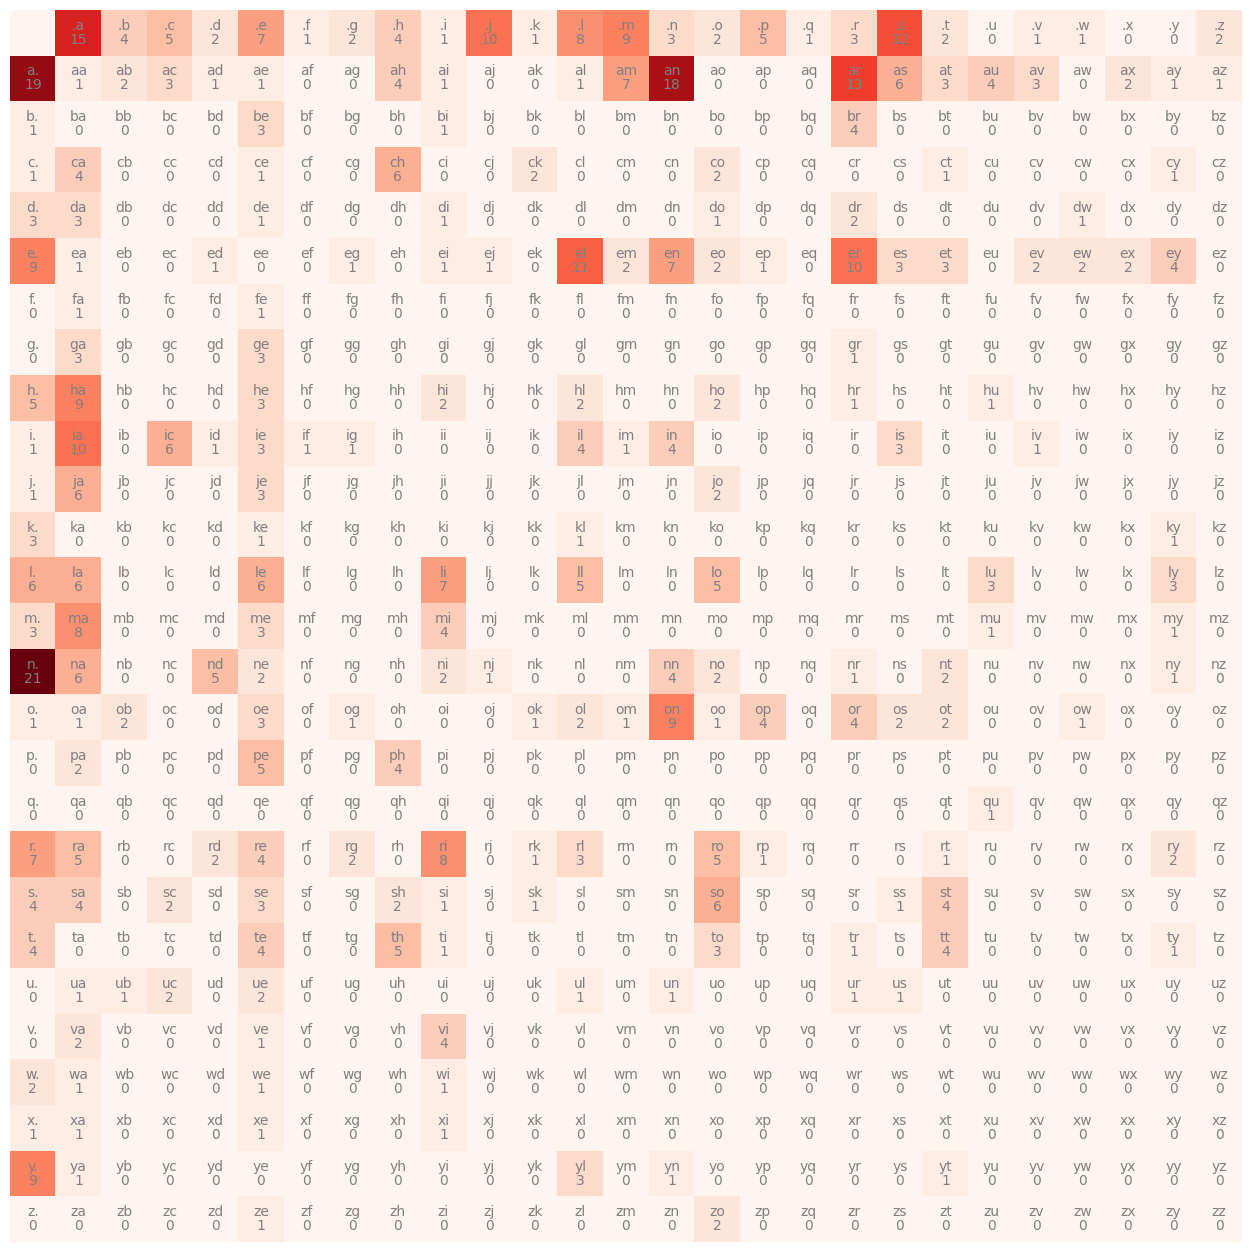

In [459]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')
for i in range(27):
    for j in range(27):
        # skip drawing [start,end] cell
        if (i == j == 0):
            continue
            
        chstr = itos[i] + itos[j]
        style_props = {"ha":"center",  "color":"gray"}
        plt.text(j, i, chstr, **style_props, va="bottom")
        plt.text(j, i, N[i, j].item(), **style_props, va="top")
plt.axis('off')

(np.float64(-0.5), np.float64(26.5), np.float64(727.5), np.float64(-0.5))

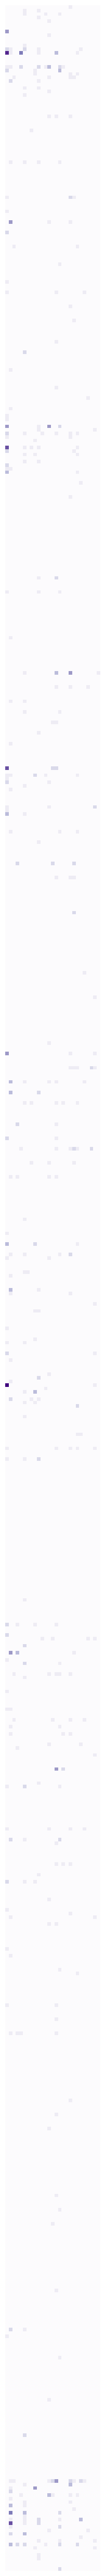

In [460]:
plt.figure(figsize=(64,64))
plt.imshow(N2, cmap='Purples')
plt.axis('off')

In [461]:
P = N.float()

# normalize each each element in each row with respect to
# all other elements in the same row
# e.g. X = [
#            [1,2,3],
#            [1,1,1],
#          ]
# dimension = 1 <-- columns
# X = X / X.sum(dimenstion, keepdim=True)
# X
# [
#    [0.16, 0.33, 0.5],
#    [0.33, 0,33, 0,33]
# ]

P = P / P.sum(1, keepdim=True)
P2 = N2.float()
P2 = P2 / P2.sum(1, keepdim=True)


In [469]:
def get_next_index(probab, current_index):
    p = probab[current_index]
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    return ix

In [470]:
for _ in range(0):
    index = 0
    name = ''
    names = []
    while True:
        index = get_next_index(index)
        # print(index)
        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

for _ in range(0):
    counter = 0
    index = 0
    name = ''
    names = []
    while True:
        if counter < 2:
            index = get_next_index(P, index)
            name += itos[index]
        else:
            lp = name[-2:]
            index_of_last_pair = ptoi[lp]
            
            index = get_next_index(P2, index_of_last_pair)
            name += itos[index]
            # print('last pair and index:', lp, itos[index])
        
        # print('out index', index, '\n')
        counter += 1
        if name[-1:] == '.':
            names.extend(name)
            name = ''
            break

    print(''.join(names))

on.
zoey.
zel.
mashua.
da.
ctoran.
tt.
am.
mily.
lyn.
fer.
an.
orick.
b.
carpenry.
s.
hua.
man.
faubrookly.
lucy.


In [ ]:
log_likelihood = 0.0
n = 0
for w in words:
# for w in ['mm']:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

nll = -log_likelihood
print(f'{nll/n}')

In [422]:
# lets create a training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = [special] + list(w) + [special]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

. m
m a
a m
m .
. m
m a
a x
x .


In [423]:
import torch.nn.functional as F

In [424]:
# initialize 27 neurons' weights, each of them receives 27 inputs
W = torch.randn((27, 27), requires_grad=True)

In [425]:
# forward pass vvvv
for k in range(200):
    # convert each of the examples from bigrams to one-hot representation
    xenc = F.one_hot(xs, num_classes=27).float()
    # predict log-counts
    logits  = xenc @ W
    # counts, equivalent to what we have in N
    counts = logits.exp()
    # probabilities for next character
    probs = counts / counts.sum(1, keepdims=True)
    
    loss = -probs[torch.arange(num), ys].log().mean()

In [426]:
print(loss.item())

4.155803203582764


In [18]:
# backward pass
W.grad = None 
loss.backward()

In [19]:
W.data += -80 * W.grad

In [20]:
for _ in range(20):
    index = 0
    name = ''
    names = []
    while True:
        xenc = F.one_hot(torch.tensor([index]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)


        index = torch.multinomial(p, num_samples=1, replacement=True).item()

        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

efnmibzfvyeonfnsenphzaefvevgaphi.
jhdeycgvntdejontpkueocxhzacoxycqwpankzaoatck.
j.
roidmife.
qjfjhwe.
hoguaifduyqmatpaovol.
y.
asfbhjhwqmpn.
ponoa.
cxokpkvtaumxwtottprsya.
wcfxeduatyhuipcsyhicxhdey.
czuuatxxtysjyrenn.
enki.
hdiaqmiaxtyenibcgz.
za.
wl.
vncvwwtdeyrrrkzanduar.
eopa.
ecx.
vhakrvmwhutd.
